In [1]:
import keras
import tensorflow as tf
from keras.models import load_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import BatchNormalization, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
model = load_model("./cnn_model/077-0.9942.h5")
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)      

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

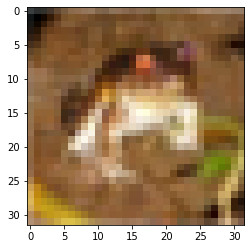

In [3]:
plt.imshow(X_train[0])
plt.show()

In [4]:
def randomization_layer(img, resizing, top_pad, bottom_pad, left_pad, right_pad):
    img = tf.image.resize(img, [32+resizing, 32+resizing]) # Resizing 
    img = tf.reshape(img, [1, 32+resizing, 32+resizing, 3]) #4D tensor
    img = tf.keras.layers.ZeroPadding2D(padding = ((top_pad, bottom_pad), (left_pad, right_pad)))(img) # padding
    img = tf.reshape(img, [32+resizing+(top_pad+bottom_pad), 32+resizing+(left_pad+right_pad), 3])
    return img

randomized_X_train = np.empty(X_train.shape[0], dtype=object)
randomized_X_test = np.empty(X_test.shape[0], dtype=object)

for i in range(X_train.shape[0]):    
    resizing_num = np.random.randint(30)
    top_pad = np.random.randint(10)
    bottom_pad = np.random.randint(10)
    left_pad = np.random.randint(10)
    right_pad = np.random.randint(10)
    randomized_X_train[i] = randomization_layer(X_train[i], resizing_num, top_pad, bottom_pad, left_pad, right_pad)

for i in range(X_test.shape[0]):    
    resizing_num = np.random.randint(30)
    top_pad = np.random.randint(10)
    bottom_pad = np.random.randint(10)
    left_pad = np.random.randint(10)
    right_pad = np.random.randint(10)    
    randomized_X_test[i] = randomization_layer(X_test[i], resizing_num, top_pad, bottom_pad, left_pad, right_pad)

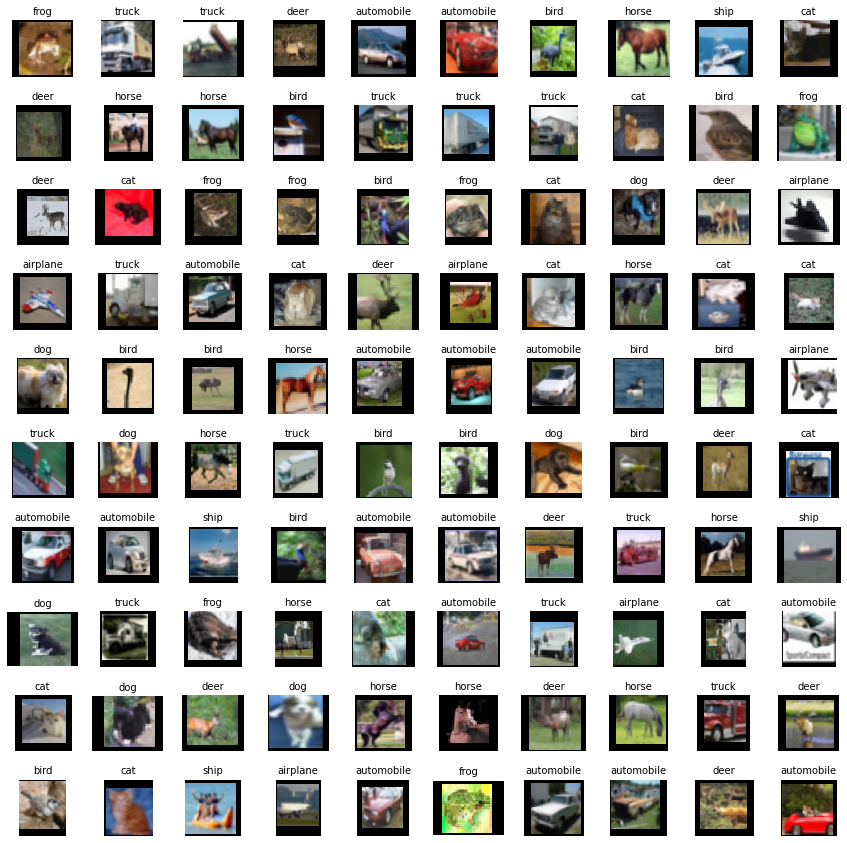

In [5]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(np.array(randomized_X_train[index], np.int32), interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index][0]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()